## Creating Dataset

In [1]:
import os
from six.moves import xrange
import random
import PIL.Image as Image
import numpy as np
import cv2
import time
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import backend as K
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator
from skimage.transform import rotate
from scipy.misc import imsave

# Custom scripts
import lscript as lsp
import modelling as md
import dataset as dset

Using TensorFlow backend.


In [2]:
def get_compress_frames_data(filename,normalisation,print_filenames=False):
  ''' Given a directory containing extracted frames, return a np array with all the frames '''
  
  ret_arr = []
  for parent, dirnames, filenames in os.walk(filename):

    filenames = sorted(filenames)
    if (print_filenames):
        print('filenames:',filenames)
    
    for i in range(0,len(filenames)):
      if (filenames[i].endswith('.png')):
        image_name = str(filename) + '/' + str(filenames[i])
        img = Image.open(image_name)
        img_data = np.array(img)
        ret_arr.append(img_data)
        
  ret_arr=np.array(ret_arr)
  if (normalisation==True):
        ret_arr=ret_arr/255
  return np.array(ret_arr)

True
filenames: ['000.png', '001.png', '002.png', '003.png', '004.png', '005.png', '006.png', '007.png', '008.png', '009.png', '010.png', '011.png', '012.png', '013.png', '014.png', '015.png', '016.png', '017.png', '018.png', '019.png', '020.png', '021.png', '022.png', '023.png', '024.png', '025.png', '026.png', '027.png', '028.png', '029.png', '030.png', '031.png', '032.png', '033.png', '034.png', '035.png', '036.png', '037.png', '038.png', '039.png', '040.png', '041.png', '042.png', '043.png', '044.png', '045.png', '046.png', '047.png', '048.png', '049.png', '050.png', '051.png', '052.png', '053.png', '054.png', '055.png', '056.png', '057.png', '058.png', '059.png', '060.png', '061.png', '062.png', '063.png', '064.png', '065.png', '066.png', '067.png', '068.png', '069.png', '070.png', '071.png', '072.png', '073.png', '074.png', '075.png', '076.png', '077.png', '078.png', '079.png', '080.png', '081.png', '082.png', '083.png', '084.png', '085.png', '086.png', '087.png', '088.png', '089

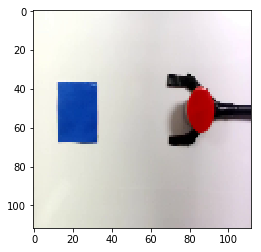

In [3]:
## reading data

imagefolderpath= ('/nobackup/leopauly/IROSDataset/demo_new/Demo_push_270') 
print(os.path.isdir(imagefolderpath))
vids=get_compress_frames_data(imagefolderpath,normalisation=False,print_filenames=True)
print('Demo images array shape:',vids.shape)

lsp.view_image(vids[0])

In [4]:
## Saving originals

for i in range(len(vids)):
    imsave('/nobackup/leopauly/IROSDataset/VizData/push/270deg/'+'%.3d'%i+'.png',vids[i])
    

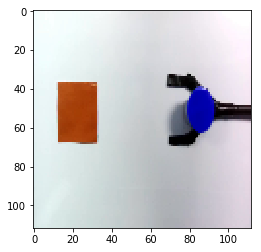

In [5]:
## Augmenting data - Changing color
for i in range(len(vids)):
    im_=vids[i][:,:,::-1]
    vids[i]=im_
lsp.view_image(vids[0])

In [6]:
## Saving augmented data
for i in range(len(vids)):
    imsave('/nobackup/leopauly/IROSDataset/VizData/push/270degC/'+'%.3d'%i+'.png',vids[i])

### Display

True
filenames: ['000.png', '001.png', '002.png', '003.png', '004.png', '005.png', '006.png', '007.png', '008.png', '009.png', '010.png', '011.png', '012.png', '013.png', '014.png', '015.png', '016.png', '017.png', '018.png', '019.png', '020.png', '021.png', '022.png', '023.png', '024.png', '025.png', '026.png', '027.png', '028.png', '029.png', '030.png', '031.png', '032.png', '033.png', '034.png', '035.png', '036.png', '037.png', '038.png', '039.png', '040.png', '041.png', '042.png', '043.png', '044.png', '045.png', '046.png', '047.png', '048.png', '049.png', '050.png', '051.png', '052.png', '053.png', '054.png', '055.png', '056.png', '057.png', '058.png', '059.png', '060.png', '061.png', '062.png', '063.png', '064.png', '065.png', '066.png', '067.png', '068.png', '069.png', '070.png', '071.png', '072.png', '073.png', '074.png', '075.png', '076.png', '077.png', '078.png', '079.png', '080.png', '081.png', '082.png', '083.png', '084.png', '085.png', '086.png', '087.png', '088.png', '089

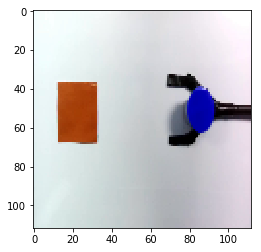

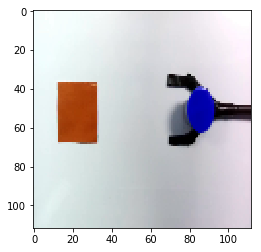

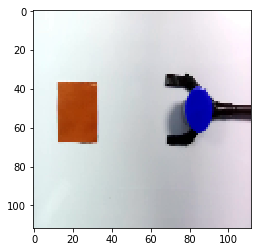

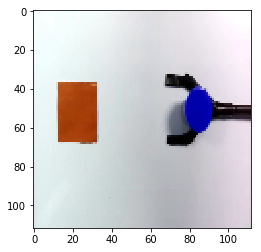

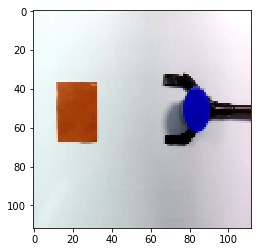

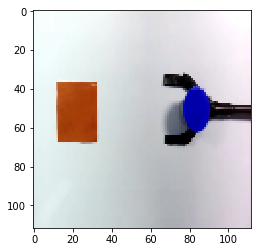

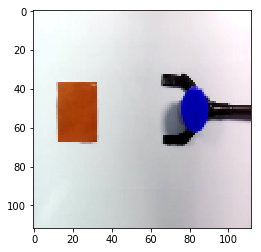

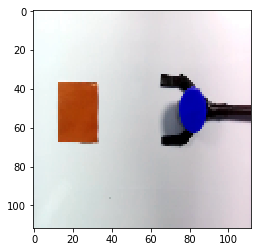

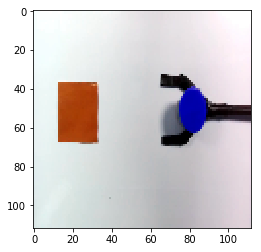

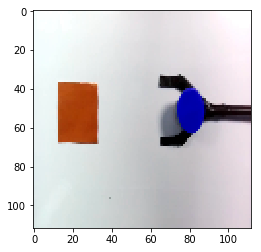

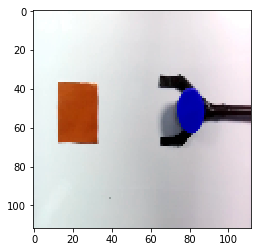

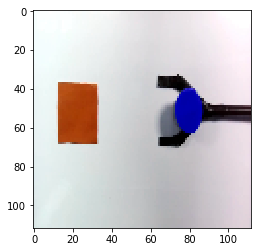

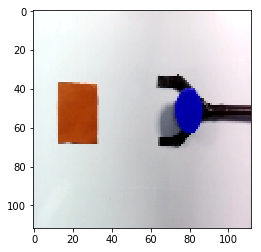

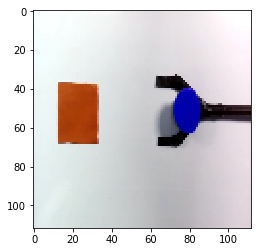

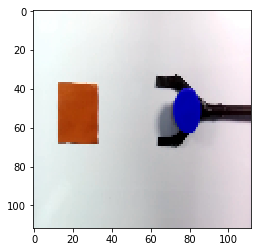

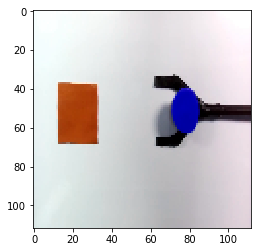

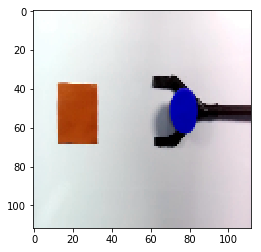

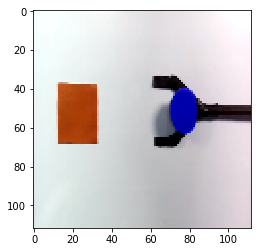

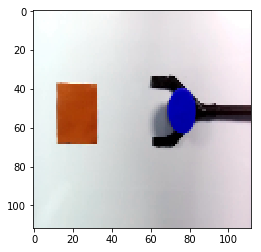

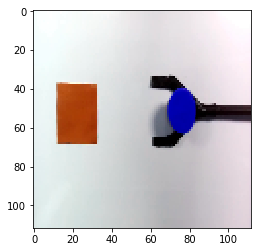

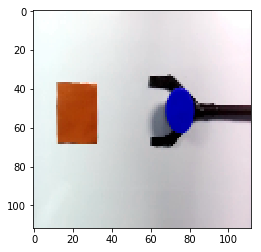

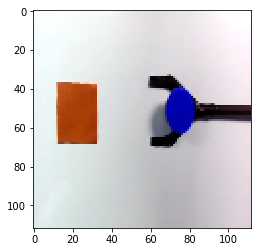

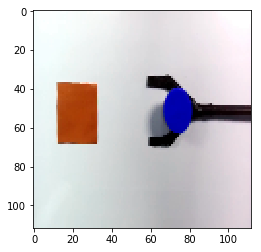

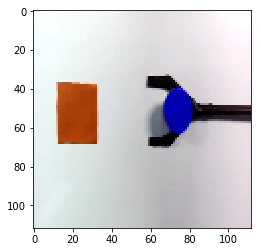

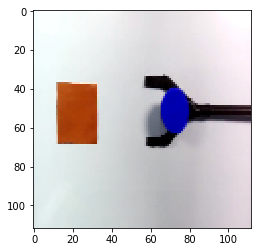

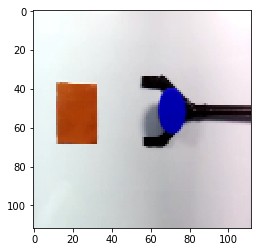

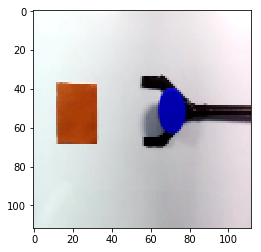

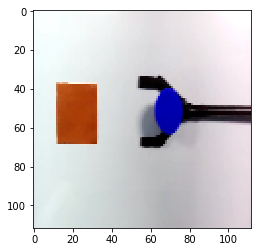

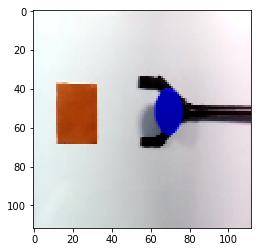

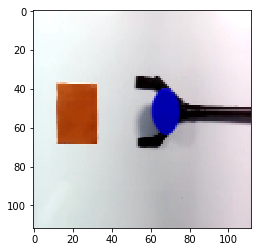

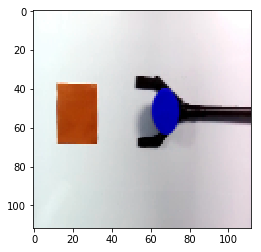

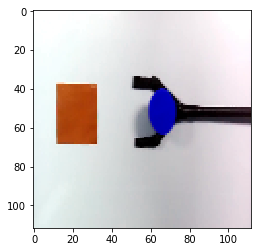

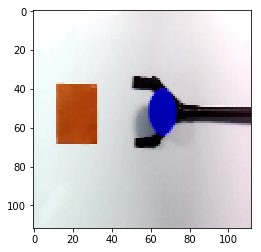

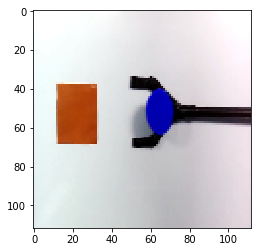

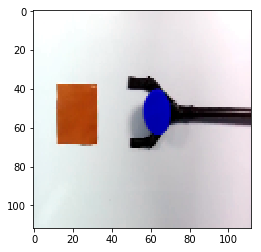

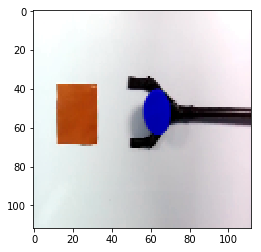

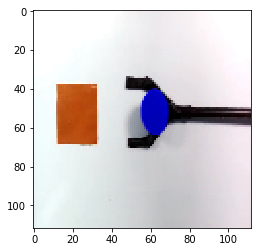

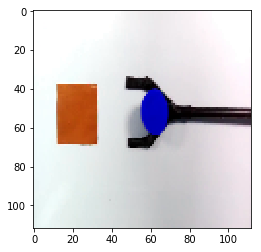

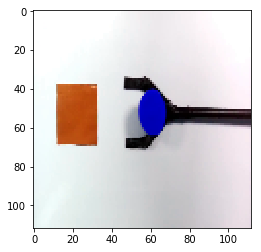

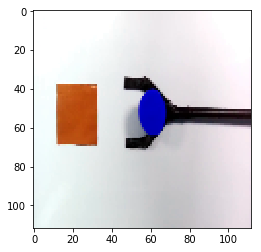

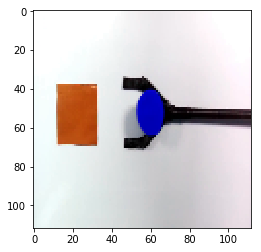

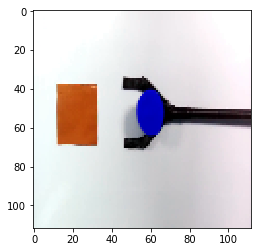

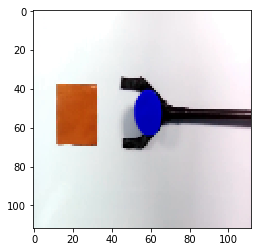

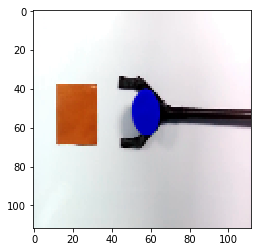

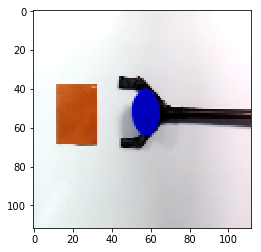

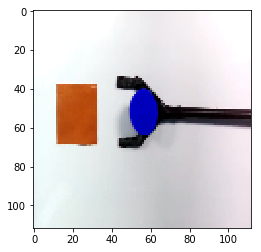

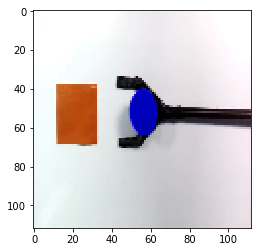

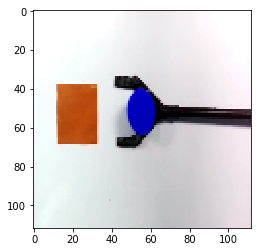

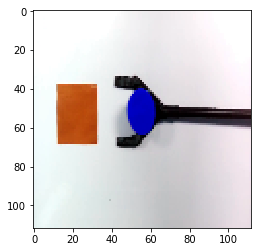

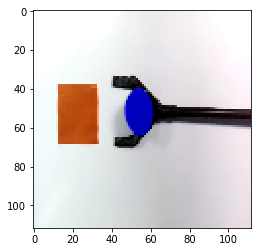

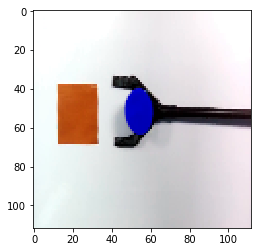

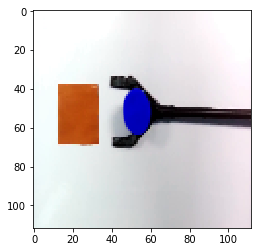

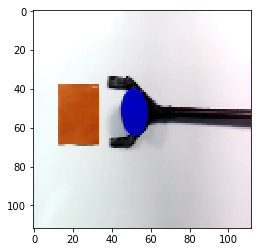

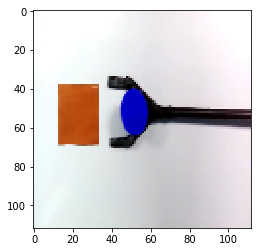

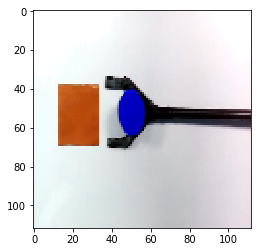

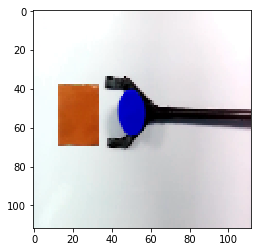

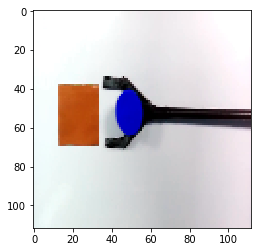

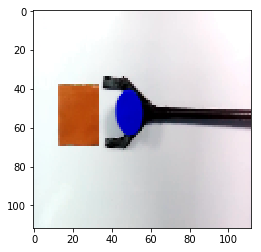

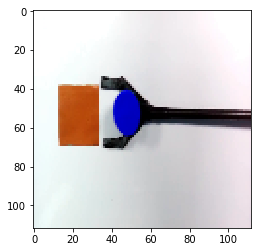

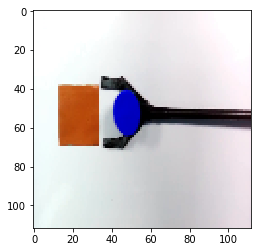

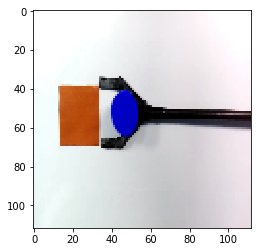

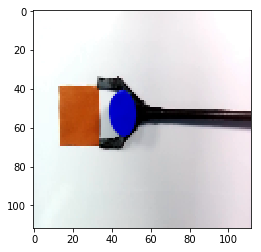

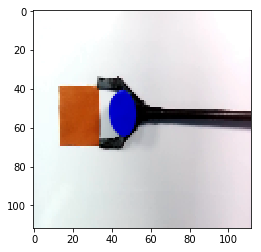

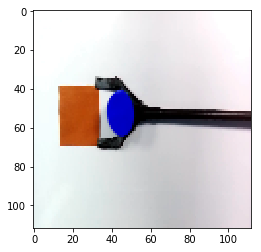

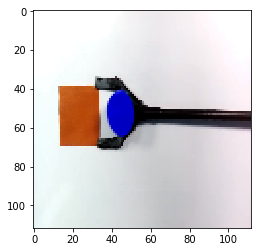

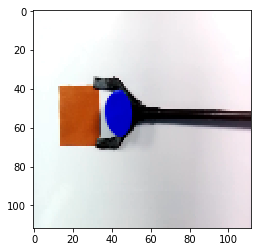

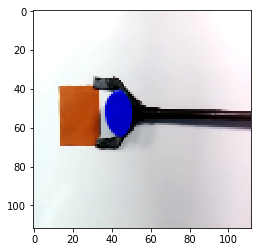

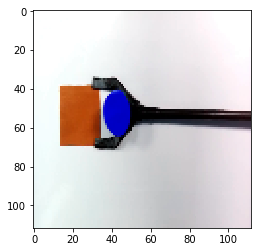

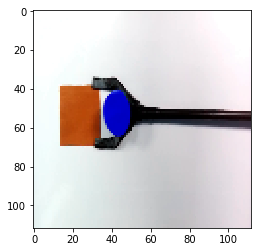

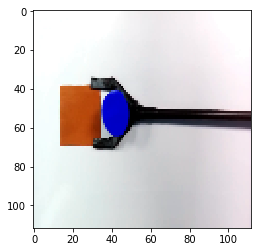

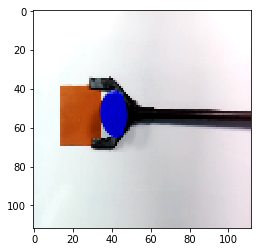

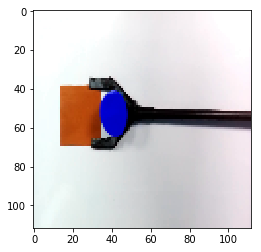

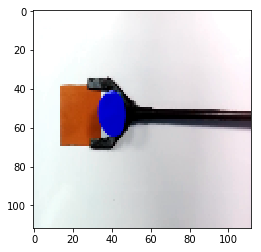

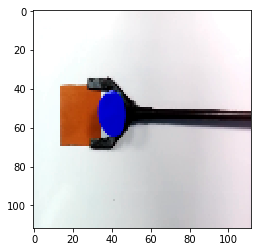

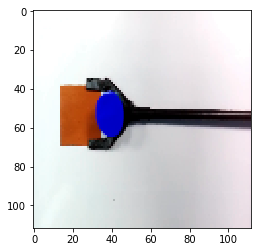

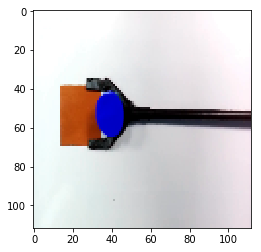

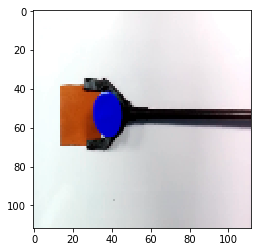

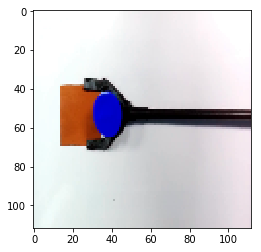

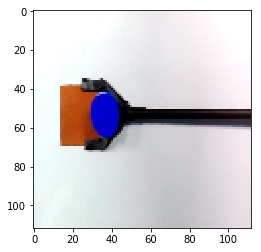

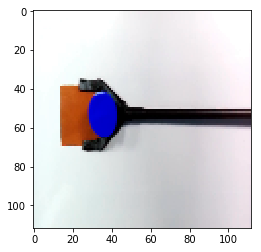

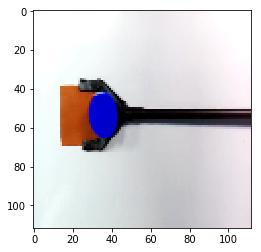

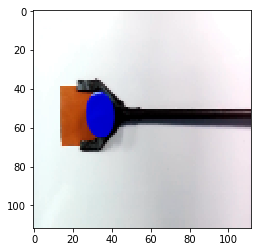

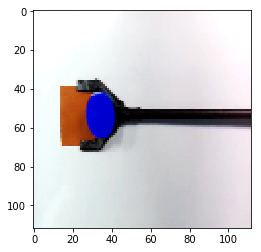

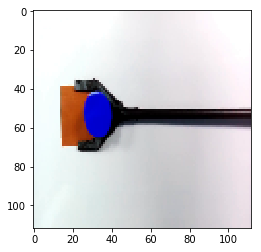

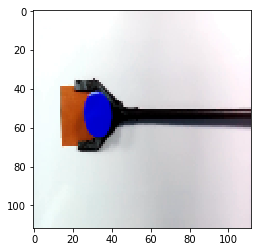

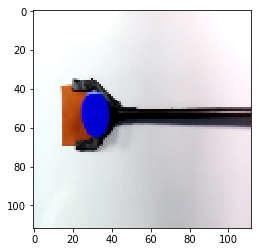

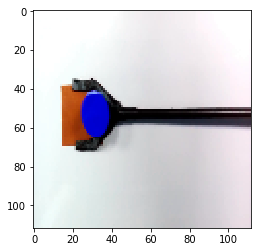

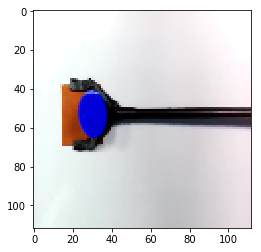

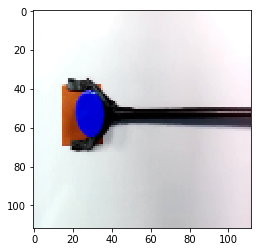

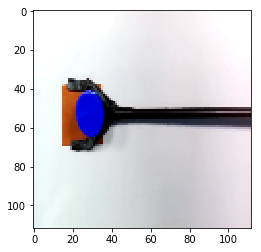

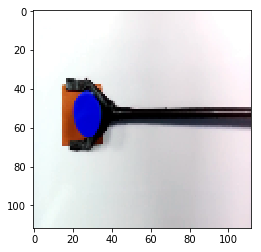

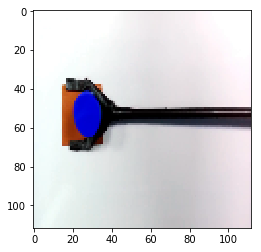

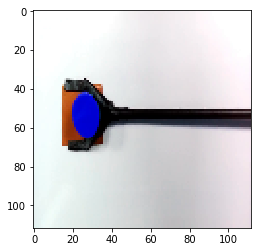

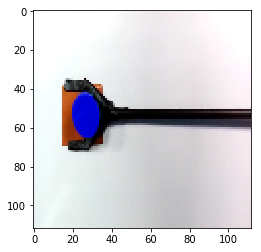

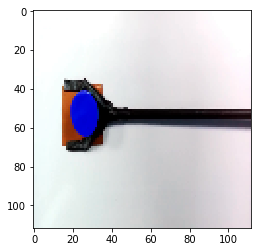

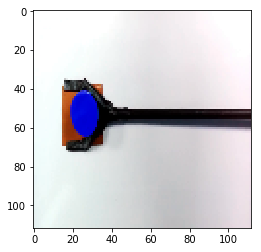

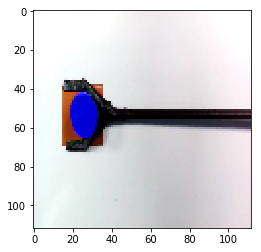

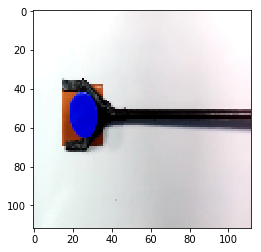

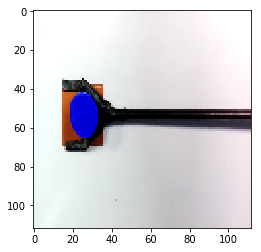

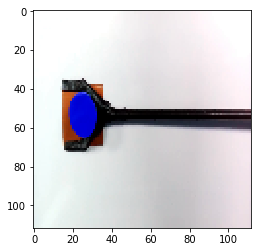

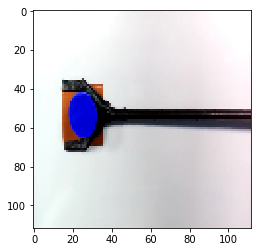

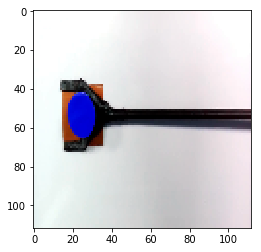

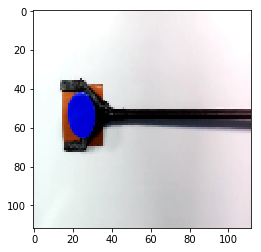

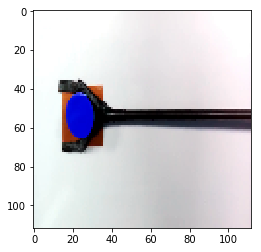

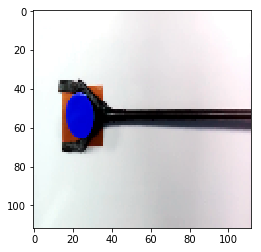

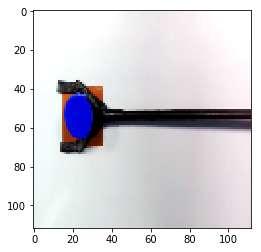

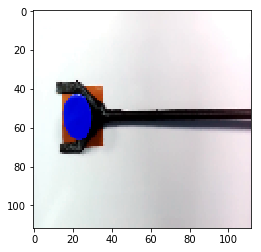

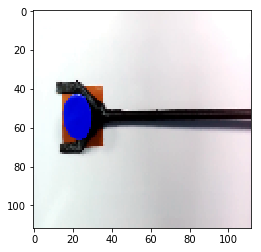

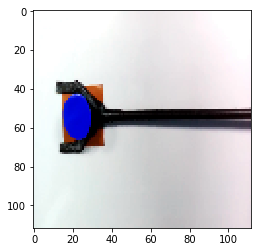

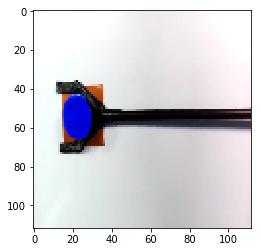

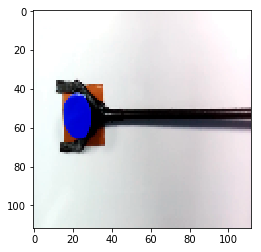

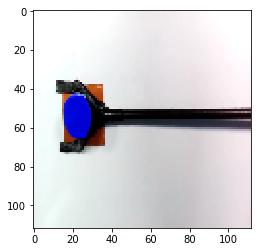

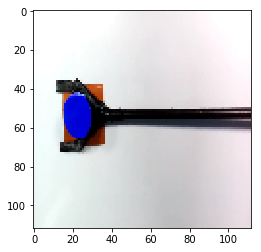

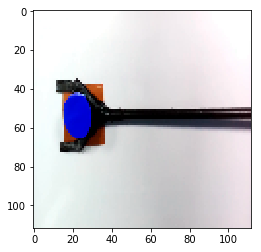

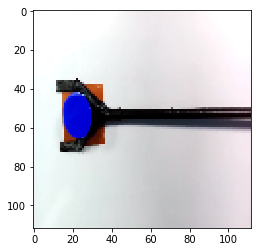

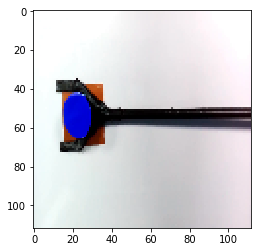

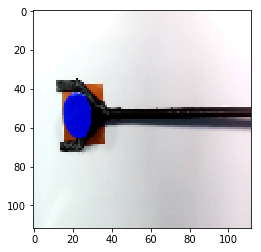

In [8]:
imagefolderpath= ('/nobackup/leopauly/IROSDataset/VizData/push/270degC') 
print(os.path.isdir(imagefolderpath))
vids=get_compress_frames_data(imagefolderpath,normalisation=False,print_filenames=True)
print('Demo images array shape:',vids.shape)

for i in range(len(vids)):
    lsp.view_image(vids[i])